# The goal of this Project u can check in my README

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# This dataset contains advertising Sales of the Radio, Tv, Newspapers

In [2]:
def load_dataset_for_simple_linear_regression():
    data = pd.read_csv("advertising.csv")
    return data
data = load_dataset_for_simple_linear_regression()
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Simple Linear Regression
*I know the accuracy is very little, But the purpose of this codes is not to make accuracy great or make errors less you can see the goal of this project in my README*

accuracy: 0.1222419039947863
mean absolute error: 4.229414682241112
mean squared error: 24.384049466937633


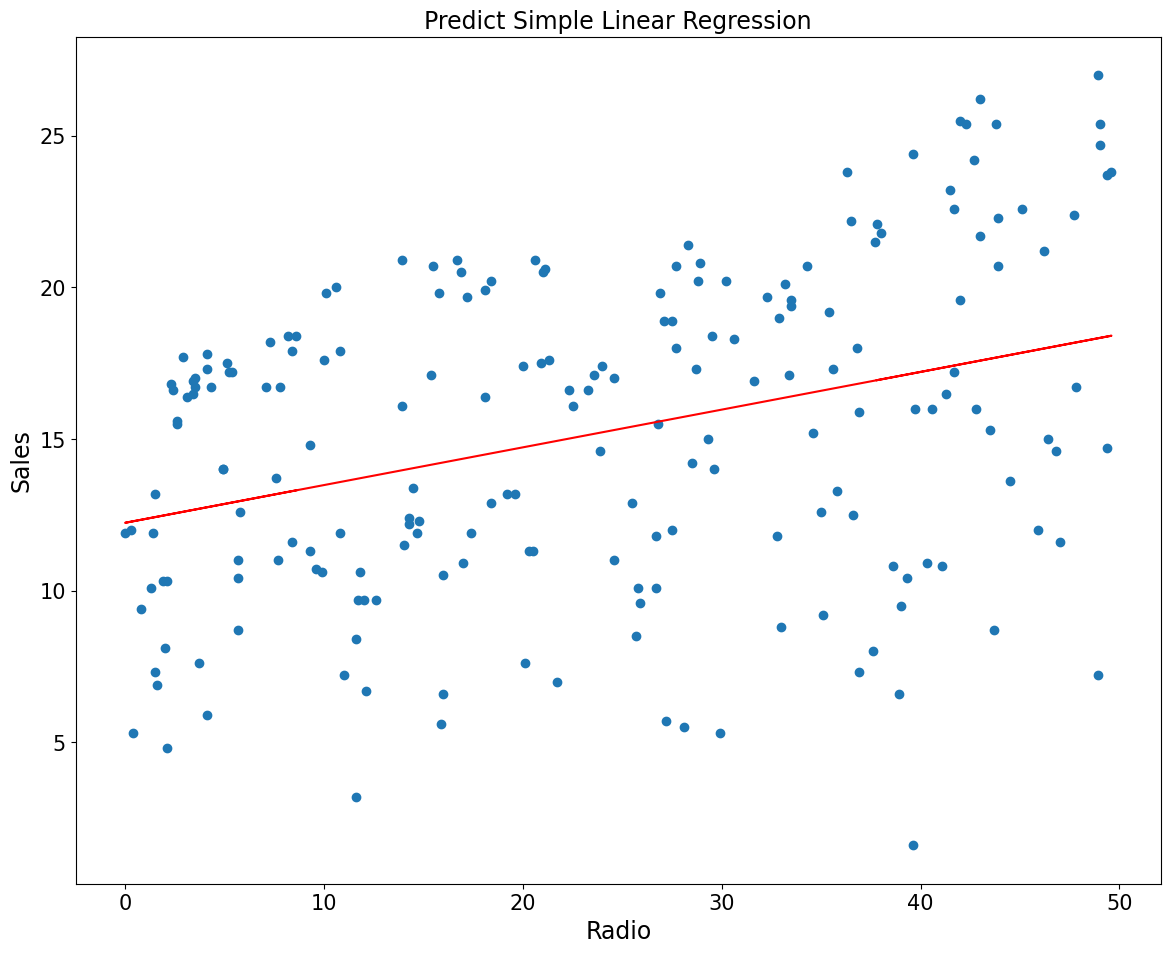

In [3]:
def simple_linear_regression(data):
    x = data.iloc[:, 1].values.reshape(-1, 1)
    y = data.iloc[:, -1].values
    model = LinearRegression()
    model.fit(x, y)
    y_predicted = model.predict(x)
    print(f"accuracy: {r2_score(y, y_predicted)}")
    print(f"mean absolute error: {mean_absolute_error(y, y_predicted)}")
    print(f"mean squared error: {mean_squared_error(y, y_predicted)}")
    plt.figure(figsize=(14, 11))
    plt.scatter(x, y)
    plt.plot(x, y_predicted, color="r")
    plt.title("Predict Simple Linear Regression", fontsize=17)
    plt.xlabel("Radio", fontsize=17)
    plt.xticks(fontsize=15)
    plt.ylabel("Sales", fontsize=17)
    plt.yticks(fontsize=15)
    plt.show()
simple_linear_reg = simple_linear_regression(data)
simple_linear_reg

# Gradient Descent for simple Linear Regression

accuracy: 0.12224190399478618
mean absolute error: 4.2294146822411
mean squared error: 24.384049466937636


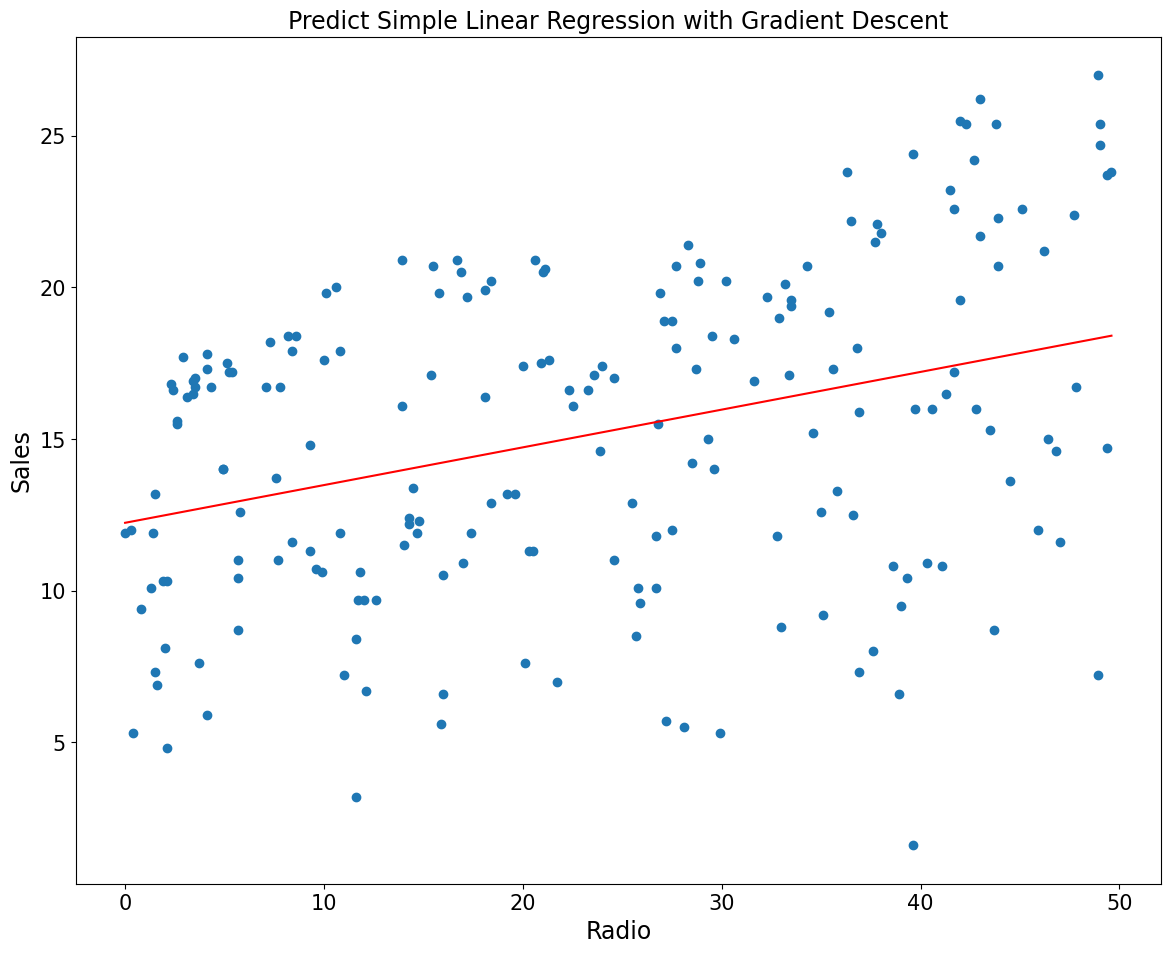

In [4]:
def gradient_descent(data):
    x = data.iloc[:, 1].values
    y = data.iloc[:, -1].values
    m, b = 0, 0
    n = float(len(x))
    all_res = []
    learning_rate = 0.001
    for _ in range(55000):
        y_predicted = (m*x)+b
        cost = mean_squared_error(y, y_predicted)
        m_diravitive = -(2/n)*sum(x*(y-y_predicted))
        b_diravitive = -(2/n)*sum(y-y_predicted)
        m = m - learning_rate * m_diravitive
        b = b - learning_rate * b_diravitive
        all_res.append(b)
    print(f"accuracy: {r2_score(y, y_predicted)}")
    print(f"mean absolute error: {mean_absolute_error(y, y_predicted)}")
    print(f"mean squared error: {mean_squared_error(y, y_predicted)}")
    plt.figure(figsize=(14, 11))
    plt.scatter(x, y)
    plt.plot([min(x), max(x)], [min(y_predicted), max(y_predicted)], color='red',markerfacecolor='red',
             markersize=10)
    plt.title("Predict Simple Linear Regression with Gradient Descent", fontsize=17)
    plt.xlabel("Radio", fontsize=17)
    plt.xticks(fontsize=15)
    plt.ylabel("Sales", fontsize=17)
    plt.yticks(fontsize=15)
    plt.show()
just_gradients = gradient_descent(data)
just_gradients

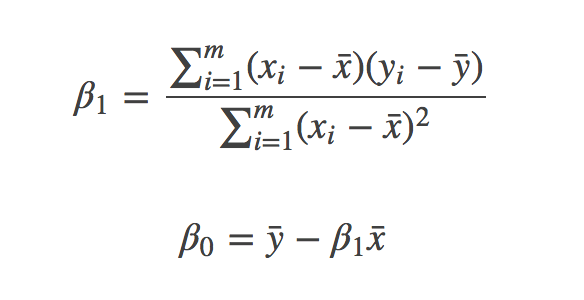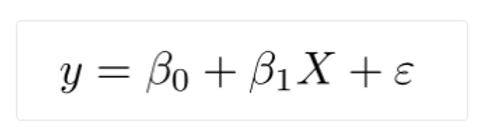

# Simple Linear Regression without using any modules Machine Learning

accuracy: 0.12224190399478622
mean absolute error: 4.229414682241111
mean squared error: 24.384049466937647


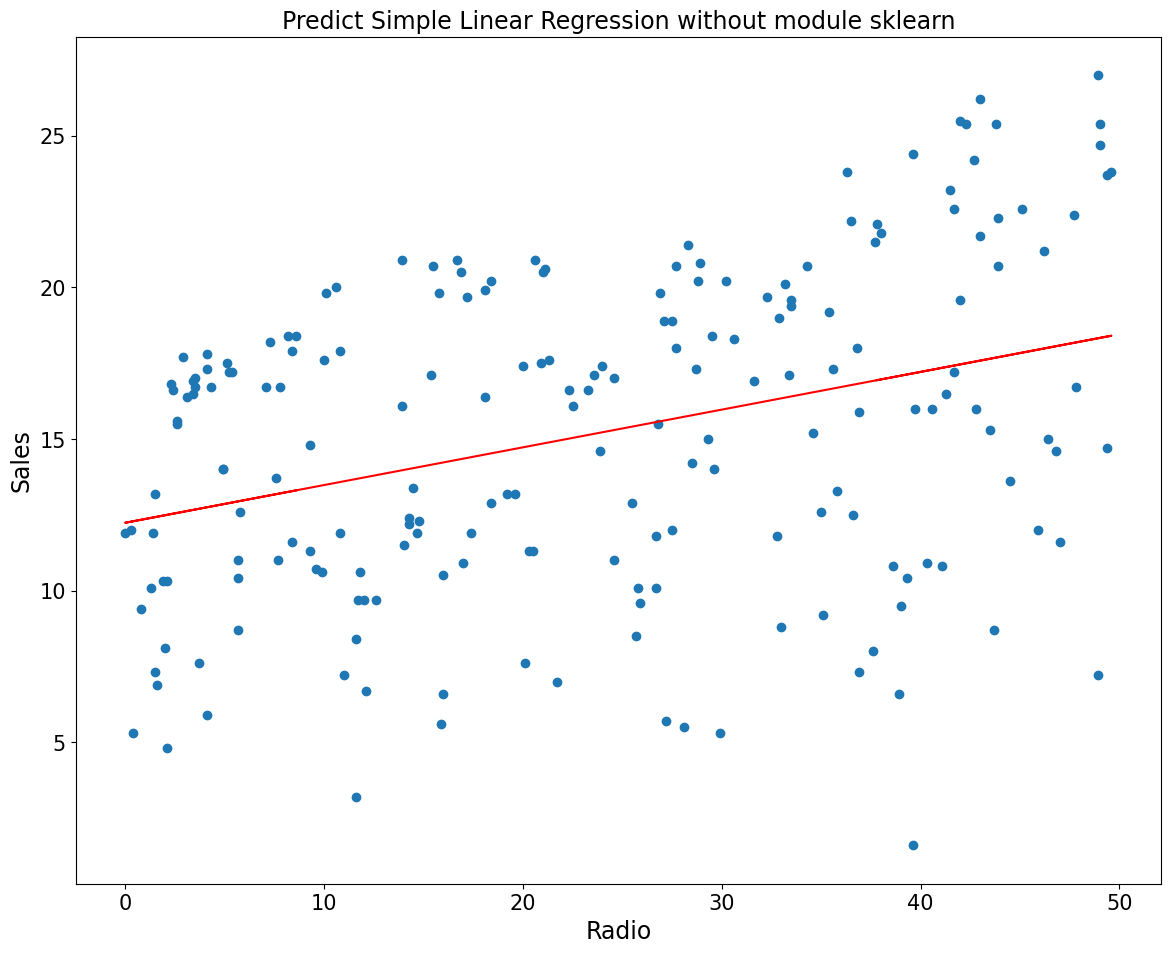

In [5]:
def simple_linear_regression2(data):
    x = data.iloc[:, 1]
    y = data.iloc[:, 3]
    m = sum(([i for i in x] - np.mean(x)) * ([y[j] for j in range(len(y))] - np.mean(y))) / sum(([i for i in x] - np.mean(x))**2)
    b = np.mean(y)  - m * np.mean(x)
    y_predict = m*x+b
    print(f"accuracy: {sum(([i for i in y_predict] - np.mean(y))**2) / sum(([y[i] for i in range(len(y))] - np.mean(y))**2)}")
    print(f"mean absolute error: {1/len(y) * sum(abs([i for i in y] - y_predict))}")
    print(f"mean squared error: {1/len(y) * sum(([i for i in y] - y_predict)**2)}")
    plt.figure(figsize=(14, 11))
    plt.scatter(x, y)
    plt.plot(x, y_predict, color="r")
    plt.title("Predict Simple Linear Regression without module sklearn", fontsize=17)
    plt.xlabel("Radio", fontsize=17)
    plt.xticks(fontsize=15)
    plt.ylabel("Sales", fontsize=17)
    plt.yticks(fontsize=15)
simple_linear_reg2 = simple_linear_regression2(data)
simple_linear_reg2

# This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [6]:
def load_dataset_for_multiple_linear_regression():
    data = pd.read_csv("kc_house_data.csv")
    data.iloc[:,1] = pd.to_datetime(data.iloc[:, 1])
    return data
data2 = load_dataset_for_multiple_linear_regression()
data2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Multiple Linear Regression

In [7]:
def multiple_linear_regression(data2):
    x = data2.iloc[:, 5:8].drop("sqft_lot", axis=1).values.reshape(-1, 2)
    y = data2.iloc[:, 2].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)
    model = LinearRegression().fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(f"accuracy: {r2_score(y_test, y_predict)}")
    print(f"mean absolute error: {mean_absolute_error(y_test, y_predict)}")
    print(f"mean squared error: {mean_squared_error(y_test, y_predict)}")
multiple_linear_reg = multiple_linear_regression(data2)
multiple_linear_reg

accuracy: 0.4919679985089711
mean absolute error: 175148.28747920084
mean squared error: 69090814351.2242


# Multiple Linear Regression without using any modules Machine Learning

**P = x1**
**Q = x2**

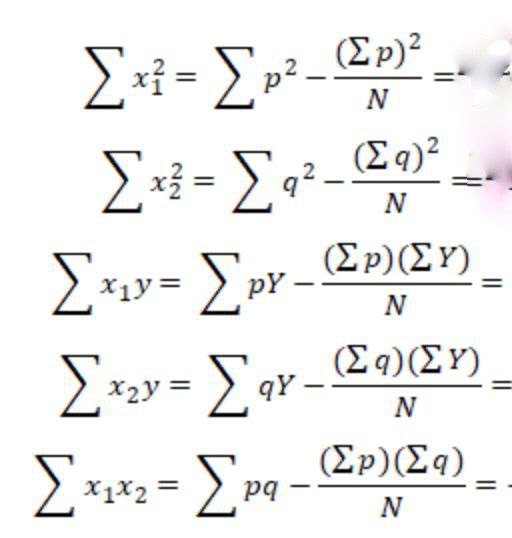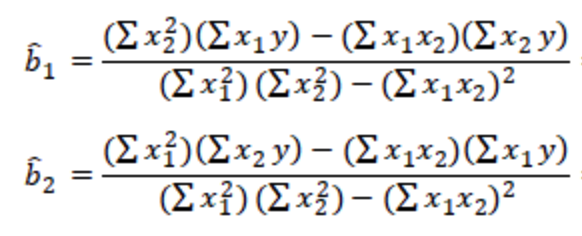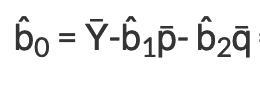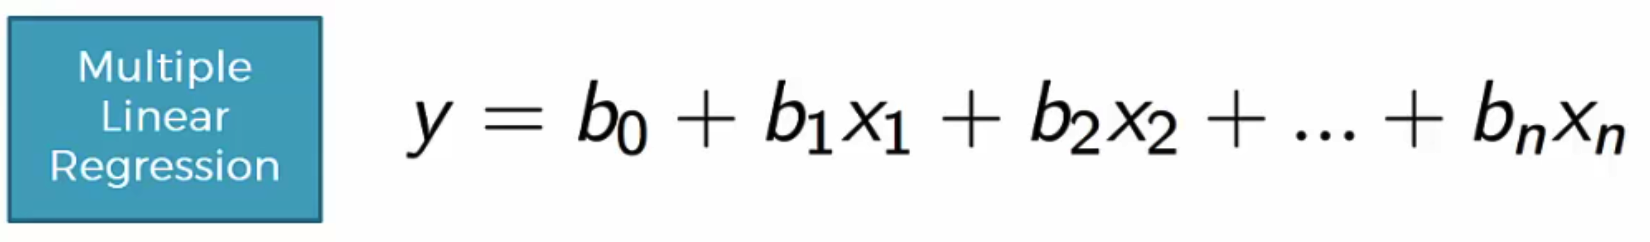

In [61]:
def multiple_linear_regression2(data2):
    x1 = data2.iloc[:, 5].values
    x2 = data2.iloc[:, 7].values
    y = data2.iloc[:, 2].values
    x1_square = np.sum([i**2 for i in x1]) - ((np.sum(x1)**2) / len(x1))
    x2_square = np.sum([i**2 for i in x2]) - ((np.sum(x2)**2) / len(x2))
    x1y = (np.sum([x1[i]*y[i] for i in range(len(x1))])) - (np.sum(x1) * np.sum(y) / len(x1))
    x2y = (np.sum([x2[i]*y[i] for i in range(len(x2))])) - (np.sum(x2) * np.sum(y) / len(x1))
    x1x2 = (np.sum([x1[i]*x2[i] for i in range(len(x1))])) - (np.sum(x1) * np.sum(x2) / len(x1))
    b1 = ((x2_square * x1y) - (x1x2 * x2y)) / ((x1_square * x2_square) - (x1x2**2))
    b2 = ((x1_square * x2y) - (x1x2 * x1y)) / ((x1_square * x2_square) - (x1x2**2))
    b0 = np.mean(y) - b1 * np.mean(x1) - b2 * np.mean(x2)
    y_predict = b0 + b1 * x1 + b2 * x2
    print(f"accuracy: {sum(([i for i in y_predict] - np.mean(y))**2) / sum(([y[i] for i in range(len(y))] - np.mean(y))**2)}")
    print(f"mean absolute error: {1/len(y)*sum(abs([i for i in y] - y_predict))}")
    print(f"mean squared error: {1/len(y) * sum(([i for i in y] - y_predict)**2)}")
multiple_linear_reg2 = multiple_linear_regression2(data2)
multiple_linear_reg2

accuracy: 0.4929321469202266
mean absolute error: 173520.8587892984
mean squared error: 68340649084.69508
